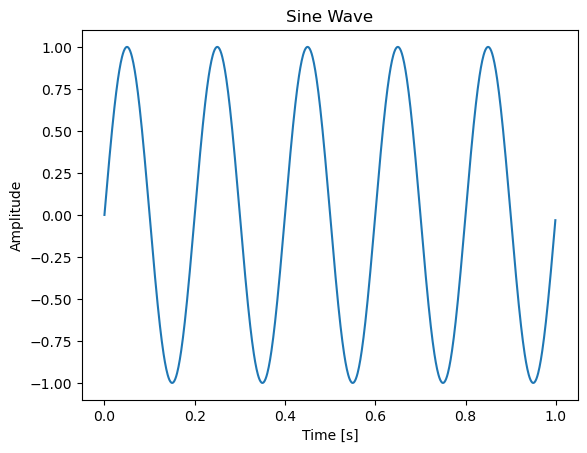

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Time specifications
fs = 1000  # Sample rate
t = np.arange(0, 1, 1/fs)  # Time vector

# Signal parameters
f = 5  # Frequency of the sine wave
A = 1  # Amplitude of the sine wave

# Generate sine wave
x = A * np.sin(2 * np.pi * f * t)

# Plot the signal
plt.plot(t, x)
plt.title("Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


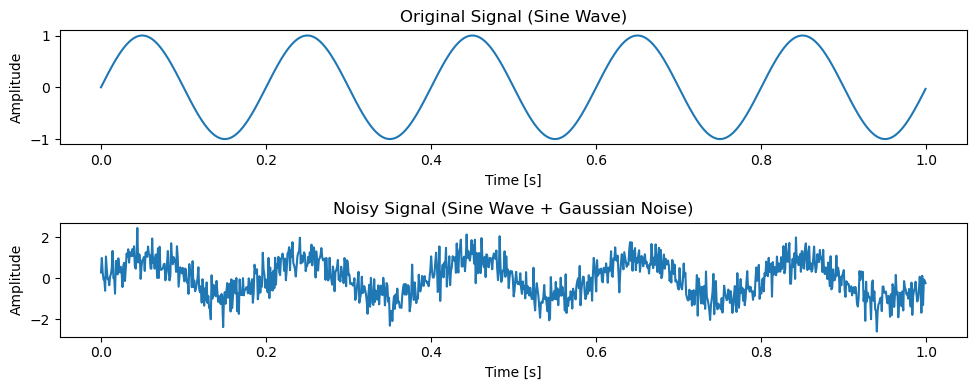

In [4]:
#Gaussian noise is generated using a normal distribution with a given mean and standard deviation.
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
fs = 1000  # Sample rate
t = np.arange(0, 1, 1/fs)  # Time vector
f = 5  # Frequency of the sine wave
A = 1  # Amplitude of the sine wave

# Generate clean sine wave
x = A * np.sin(2 * np.pi * f * t)

# Noise parameters
mean = 0
std = 0.5  # Standard deviation of the noise
noise = np.random.normal(mean, std, x.shape)

# Add noise to the signal
noisy_signal = x + noise

# Plot the noisy signal
plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title("Original Signal (Sine Wave)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal (Sine Wave + Gaussian Noise)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


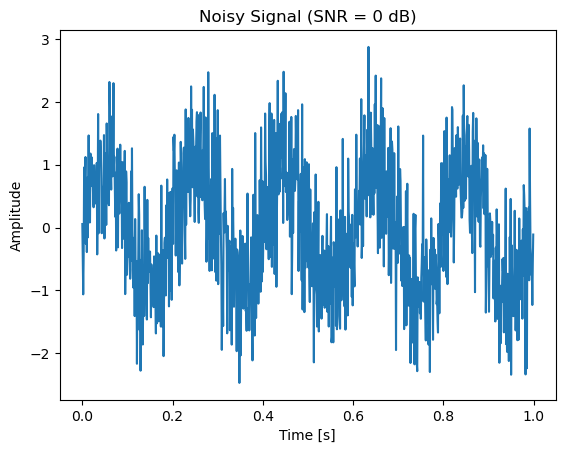

In [9]:
#Signal-to-Noise Ratio (SNR) Control
def add_noise_with_snr(signal, snr):
    # Calculate signal power and convert SNR from dB
    signal_power = np.mean(signal**2)
    noise_power = signal_power / (10**(snr / 10))
    
    # Generate white noise with calculated noise power
    noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
    
    # Add noise to the signal
    noisy_signal = signal + noise
    return noisy_signal

# Add noise with a specific SNR (e.g., 10 dB)
snr = 0  # SNR in decibels
noisy_signal_snr = add_noise_with_snr(x, snr)

# Plot the noisy signal
plt.plot(t, noisy_signal_snr)
plt.title(f"Noisy Signal (SNR = {snr} dB)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


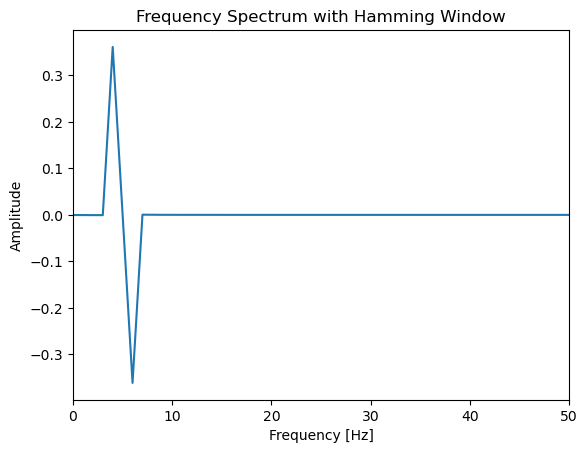

In [17]:
#Windowing Techniques
#Windowing reduces spectral leakage. For instance, applying a Hamming window:
from scipy.signal import hamming
from scipy.fft import fft, fftfreq
# Signal parameters
fs = 1000  # Sample rate
t = np.arange(0, 1, 1/fs)  # Time vector
f = 5  # Frequency of the sine wave
A = 1  # Amplitude of the sine wave

# Generate clean sine wave
signal = A * np.sin(2 * np.pi * f * t)
# Applying Hamming window
window = hamming(len(signal))
windowed_signal = signal * window

N = len(signal)  # Number of sample points
yf = fft(signal)
xf = fftfreq(N, 1 / fs)
# Fourier Transform of the windowed signal
yf_windowed = fft(windowed_signal)

# Plot
#plt.plot(xf, np.abs(yf_windowed))
plt.plot(yf_windowed)
plt.xlim(0, 50)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum with Hamming Window")
plt.show()


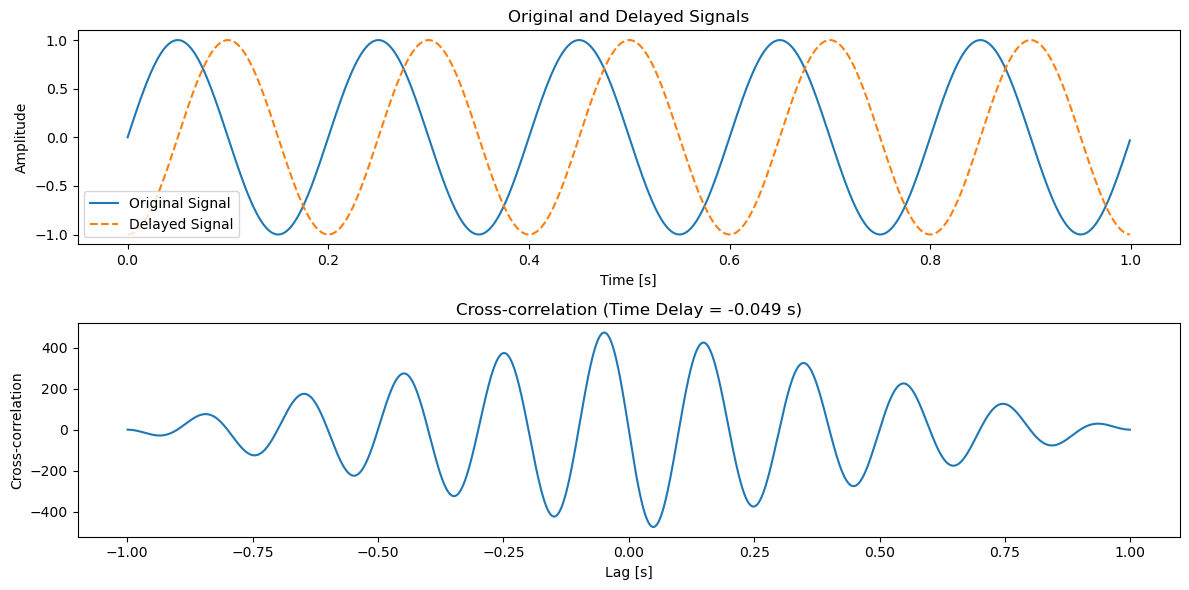

In [18]:
#Basic Cross-Correlation
#generate a simple sine wave, create a delayed version of it, and then
#compute the cross-correlation between the original and delayed signals to identify the time delay.
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Parameters for the signal
sample_rate = 1000  # samples per second
duration = 1  # seconds
frequency = 5  # Hz

# Generate the time array and original signal
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
signal = np.sin(2 * np.pi * frequency * t)

# Create a delayed version of the signal
delay_samples = 50  # delay by 50 samples
delayed_signal = np.roll(signal, shift=delay_samples)

# Compute cross-correlation
cross_corr = correlate(signal, delayed_signal, mode='full')
lags = np.arange(-len(signal) + 1, len(signal))

# Find the lag at which the correlation is maximized
max_lag = lags[np.argmax(cross_corr)]
time_delay = max_lag / sample_rate

# Plot original, delayed signals, and cross-correlation
plt.figure(figsize=(12, 6))

# Plot original and delayed signals
plt.subplot(2, 1, 1)
plt.plot(t, signal, label="Original Signal")
plt.plot(t, delayed_signal, label="Delayed Signal", linestyle="--")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Original and Delayed Signals")

# Plot cross-correlation
plt.subplot(2, 1, 2)
plt.plot(lags / sample_rate, cross_corr)
plt.xlabel("Lag [s]")
plt.ylabel("Cross-correlation")
plt.title(f"Cross-correlation (Time Delay = {time_delay:.3f} s)")
plt.tight_layout()
plt.show()


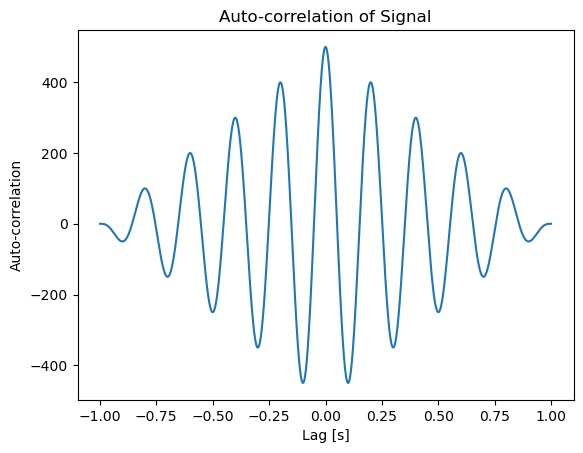

In [19]:
#Auto-Correlation
#Auto-correlation is the correlation of a signal with itself and can be used to detect periodic patterns within a single signal.
# Parameters for the signal
sample_rate = 1000  # samples per second
duration = 1  # seconds
frequency = 5  # Hz

# Generate the time array and original signal
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
signal = np.sin(2 * np.pi * frequency * t)
# Compute auto-correlation of the signal
auto_corr = correlate(signal, signal, mode='full')
lags = np.arange(-len(signal) + 1, len(signal))

# Plot auto-correlation
plt.plot(lags / sample_rate, auto_corr)
plt.xlabel("Lag [s]")
plt.ylabel("Auto-correlation")
plt.title("Auto-correlation of Signal")
plt.show()


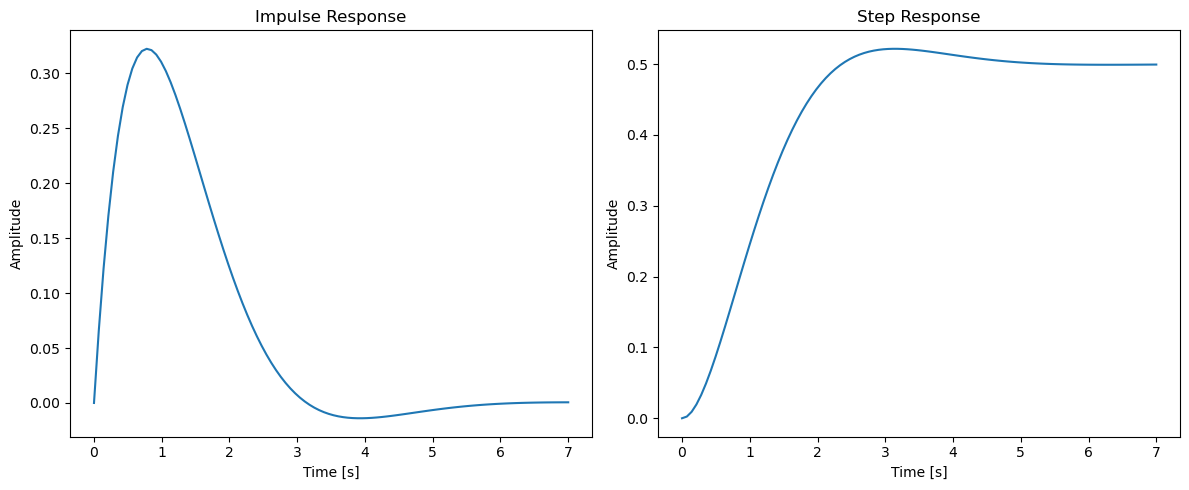

In [20]:
#System Response (Impulse and Step Responses)
#For system analysis, the impulse and step responses provide a fundamental way to understand how systems 
#respond to different inputs.
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, impulse, step

# Define an LTI system using transfer function (H(s) = 1 / (s^2 + 2s + 2))
num = [1]  # Numerator coefficients
den = [1, 2, 2]  # Denominator coefficients
system = lti(num, den)

# Impulse response
t_imp, y_imp = impulse(system)

# Step response
t_step, y_step = step(system)

# Plot responses
plt.figure(figsize=(12, 5))

# Impulse response
plt.subplot(1, 2, 1)
plt.plot(t_imp, y_imp)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Impulse Response")

# Step response
plt.subplot(1, 2, 2)
plt.plot(t_step, y_step)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Step Response")

plt.tight_layout()
plt.show()


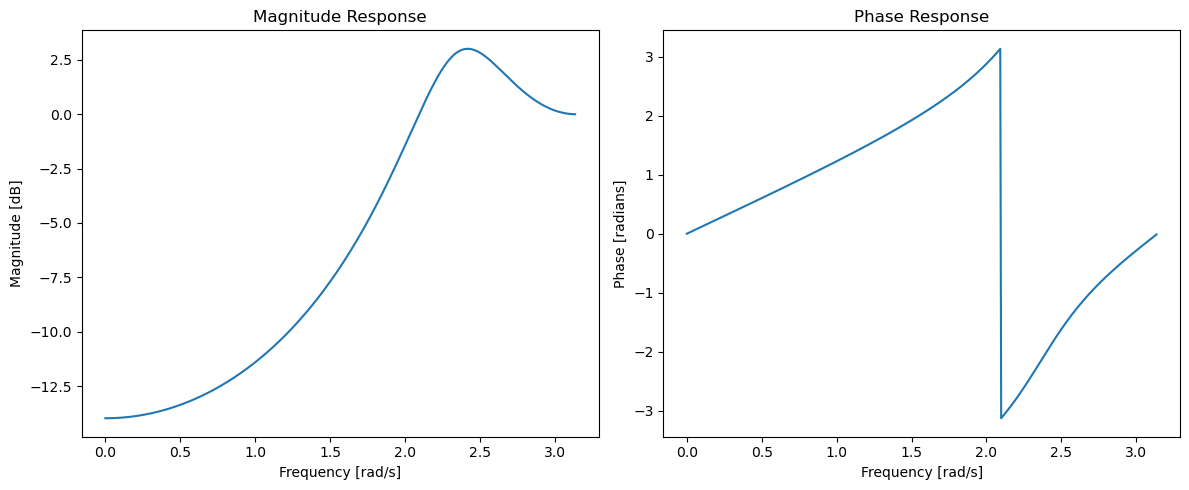

In [21]:
 #Frequency Response
#The frequency response helps understand how a system behaves at different frequencies,
#which is especially important in DSP and communication systems.
from scipy.signal import freqz
# Define an LTI system using transfer function (H(s) = 1 / (s^2 + 2s + 2))
num = [1]  # Numerator coefficients
den = [1, 2, 2]  # Denominator coefficients


# Frequency response of the system
w, h = freqz(num, den)

# Plot frequency response (Magnitude and Phase)
plt.figure(figsize=(12, 5))

# Magnitude plot
plt.subplot(1, 2, 1)
plt.plot(w, 20 * np.log10(abs(h)))  # Convert magnitude to dB
plt.xlabel("Frequency [rad/s]")
plt.ylabel("Magnitude [dB]")
plt.title("Magnitude Response")

# Phase plot
plt.subplot(1, 2, 2)
plt.plot(w, np.angle(h))
plt.xlabel("Frequency [rad/s]")
plt.ylabel("Phase [radians]")
plt.title("Phase Response")

plt.tight_layout()
plt.show()


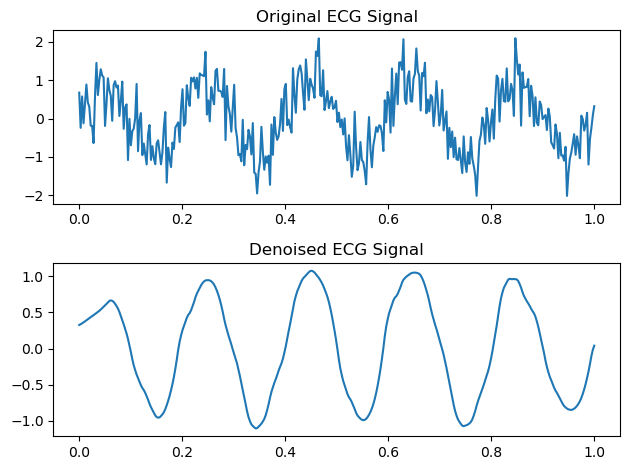

In [22]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate sample ECG data (you can replace this with real ECG data)
fs = 360  # Sampling frequency in Hz
t = np.linspace(0, 1, fs)
ecg_signal = 1.0 * np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.normal(size=len(t))

# Apply wavelet denoising
wavelet = 'db4'
coeffs = pywt.wavedec(ecg_signal, wavelet, level=4)
# Thresholding for denoising
threshold = np.sqrt(2 * np.log(len(ecg_signal)))
coeffs[1:] = [pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:]]

# Reconstruct signal from wavelet coefficients
denoised_signal = pywt.waverec(coeffs, wavelet)

# Plot original and denoised signals
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, ecg_signal, label="Original ECG")
plt.title("Original ECG Signal")
plt.subplot(2, 1, 2)
plt.plot(t, denoised_signal, label="Denoised ECG")
plt.title("Denoised ECG Signal")
plt.tight_layout()
plt.show()


Press Enter to stop the real-time filter...


In [24]:
pip install sounddevice


  Obtaining dependency information for sounddevice from https://files.pythonhosted.org/packages/af/9b/15217b04f3b36d30de55fef542389d722de63f1ad81f9c72d8afc98cb6ab/sounddevice-0.5.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/363.6 kB ? eta -:--:--
   ------------------ --------------------- 163.8/363.6 kB 4.8 MB/s eta 0:00:01
   ------------------------------------ --- 327.7/363.6 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 363.6/363.6 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
